In [1]:
import torch
import matplotlib.pyplot as plt
from torchmetrics import JaccardIndex


In [2]:
# Load our own modules
import sys

sys.path.append("./src")

from data import ValidationDataset

In [3]:
dataset = ValidationDataset("Dataset_Student")
val_dataloader = torch.utils.data.DataLoader(dataset, batch_size=5, num_workers=2)


In [4]:
model = torch.load("testseg_19.pkl", map_location=torch.device('cpu'))

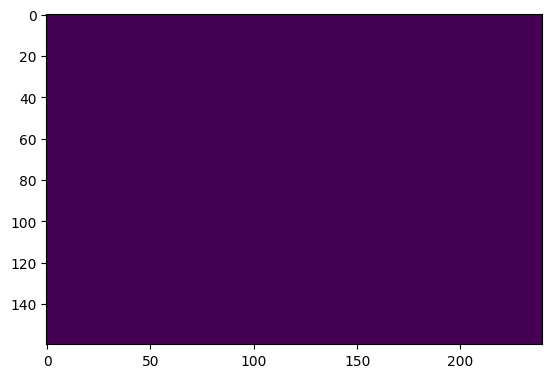

In [5]:
# First, get a mask and observe it
model.eval()

with torch.no_grad():
    x, label = dataset[100]
    x = x.unsqueeze(0)

    x = x[:, :11]
    # Transpose, since video resnet expects channels as first dim
    x = x.transpose(1, 2)
    mask = torch.argmax(model(x), dim=1)
    
plt.imshow(mask[0])


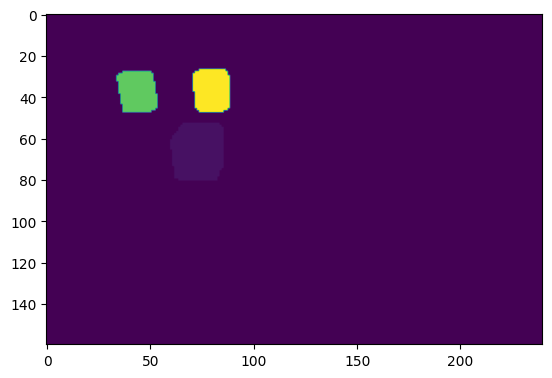

In [6]:

plt.imshow(label[21])

In [12]:

def validate(model, val_dataset, device="cpu"):
    iou = JaccardIndex(task="multiclass", num_classes=49).to(device)

    total_iou = 0
    num_batches = 0

    with torch.no_grad():
        for batch in val_dataset:
            x, target = batch   
            data = data.to(device)
            target = target.to(device)

            x = x[:, :11]
            # Transpose, since video resnet expects channels as first dim
            x = x.transpose(1, 2)
            masks = torch.argmax(model(x), dim=1)
    
            total_iou += iou(masks, target[:,21])
            num_batches += 1
    
            print(f"iou after {num_batches} batches: {total_iou/num_batches}")
    
    return total_iou / num_batches

validate(model, val_dataloader)

iou after 1 batches: 0.019152848049998283
iou after 2 batches: 0.01913902908563614
iou after 3 batches: 0.01921938546001911
iou after 4 batches: 0.019279468804597855
iou after 5 batches: 0.019316857680678368
iou after 6 batches: 0.019303394481539726
iou after 7 batches: 0.019307199865579605
iou after 8 batches: 0.019279085099697113
iou after 9 batches: 0.019285939633846283
iou after 10 batches: 0.019295088946819305
iou after 11 batches: 0.01925772987306118


KeyboardInterrupt: 